# Project

# Import Libiries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [61]:
df = pd.read_csv('Customers_Fakedata.csv')

In [62]:
df

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,10/12/2023,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2/23/2023,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,7/7/2023,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,12/30/2023,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,12/7/2023,Clothing,2.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,CUST1447,Mark Mahmoud,66.0,male,mark.mahmoud@hotmail.com,987654321.0,462.47,8/4/2023,Toys,5.0,NaN,male
2146,CUST1381,Fatma Hassan,NaN,M,fatma.hassan@yahoo.com,NaN,237.62,1/28/2024,Toys,5.0,NaN,M
2147,CUST2338,Ali Gaber,-1.0,M,ali.gaber@gmail.com,NaN,174.72,9/29/2024,Books,NaN,NaN,M
2148,CUST1694,John Ali,200.0,Female,john.ali@yahoo.com,987654321.0,250.47,2/5/2024,NaN,5.0,NaN,Female


# Get more info about data

In [63]:
print(df.describe(include='all').T)

                  count unique                    top freq              mean  \
CustomerID         2150   2100               CUST1307    2               NaN   
Name               2150     48             Sara Gaber   60               NaN   
Age              1630.0    NaN                    NaN  NaN         85.180982   
Gender             1877      6                      M  346               NaN   
Email              2150    144  sara.hassan@yahoo.com   26               NaN   
Phone            1072.0    NaN                    NaN  NaN  566841716.798507   
PurchaseAmount   2049.0    NaN                    NaN  NaN        509.418882   
PurchaseDate       2150    860             32/13/2020  122               NaN   
ProductCategory    1573      5               Clothing  332               NaN   
Rating           1821.0    NaN                    NaN  NaN          4.183416   
Unnamed             0.0    NaN                    NaN  NaN               NaN   
  Gender           1877      6          

In [64]:
df.head(30)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,10/12/2023,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2/23/2023,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,7/7/2023,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,12/30/2023,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,12/7/2023,Clothing,2.0,NaN,M
5,CUST1005,Alaa Ibrahim,NaN,F,alaa.ibrahim@hotmail.com,987654321.0,886.26,1/16/2025,NaN,2.0,NaN,F
6,CUST1006,Mark Ali,-1.0,male,mark.ali@hotmail.com,NaN,92.53,6/12/2024,Books,2.0,NaN,male
7,CUST1007,Alaa Hassan,200.0,female,alaa.hassan@hotmail.com,987654321.0,318.43,5/17/2024,Toys,10.0,NaN,female
8,CUST1008,John Hassan,89.0,Male,john.hassan@yahoo.com,NaN,883.52,32/13/2020,Home,4.0,NaN,Male
9,CUST1009,Fatma Gaber,200.0,Female,fatma.gaber@hotmail.com,NaN,966.47,1/24/2025,Electronics,2.0,NaN,Female


In [65]:
df.tail(30)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
2120,CUST2448,Lina Hassan,35.0,F,lina.hassan@yahoo.com,123456789.0,539.08,5/8/2023,NaN,2.0,NaN,F
2121,CUST1571,Alaa Ali,66.0,NaN,alaa.ali@yahoo.com,NaN,987.40,5/2/2025,Electronics,NaN,NaN,NaN
2122,CUST1420,Lina Gaber,50.0,Male,lina.gaber@gmail.com,NaN,607.73,12/30/2023,Home,10.0,NaN,Male
2123,CUST1948,Ali Hassan,NaN,Female,ali.hassan@yahoo.com,123456789.0,348.05,5/2/2024,Clothing,10.0,NaN,Female
2124,CUST2420,John Mahmoud,200.0,M,john.mahmoud@hotmail.com,987654321.0,865.23,32/13/2020,Toys,1.0,NaN,M
2125,CUST3007,Mark Mahmoud,200.0,female,mark.mahmoud@hotmail.com,123456789.0,701.88,12/29/2024,Toys,4.0,NaN,female
2126,CUST2193,Ali Hassan,NaN,Male,ali.hassan@gmail.com,987654321.0,314.57,3/19/2024,Home,4.0,NaN,Male
2127,CUST2571,John Smith,-1.0,NaN,john.smith@hotmail.com,987654321.0,595.21,10/2/2024,Electronics,1.0,NaN,NaN
2128,CUST2192,Fatma Hassan,-1.0,female,fatma.hassan@yahoo.com,123456789.0,382.28,2/25/2024,NaN,10.0,NaN,female
2129,CUST1583,Sara Hassan,200.0,F,sara.hassan@gmail.com,987654321.0,549.44,12/18/2023,Clothing,5.0,NaN,F


In [66]:
df.shape

(2150, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


# Check Missing Values

In [68]:
df.isnull().sum()

,0
CustomerID,0
Name,0
Age,520
Gender,273
Email,0
Phone,1078
PurchaseAmount,101
PurchaseDate,0
ProductCategory,577
Rating,329


# Check Duplicates

In [69]:
df.duplicated().sum()

np.int64(50)

# Columns to be cleaned
# Age :
has 520 missing value .
# Gender :
has 273 missing value , Not this repeated .
# Phone :
has 1078 missing value , Should change DT to object DT .  
# PurchaseDate :
Should change DT to Date DT .
# Unnamed :
Drop this Column .
# Gender :
has 273 missing value , Not this repeated .
# ProductCategory :
has 577 missing value .   
# Rating :
has 329 missing value .
# PurchaseAmount :
has 101 missing value .

# Data Cleaning

**Solve fault Dt**

In [70]:
df['Phone'] = df['Phone'].astype('object')
df['PurchaseDate'] = df['PurchaseDate'].replace({'32/13/2020':'2020-12-30'})
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], format='mixed', dayfirst=False, errors='coerce')
df['PurchaseDate'].isnull().sum()
df['PurchaseDate'].describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       2150 non-null   object        
 1   Name             2150 non-null   object        
 2   Age              1630 non-null   float64       
 3   Gender           1877 non-null   object        
 4   Email            2150 non-null   object        
 5   Phone            1072 non-null   object        
 6   PurchaseAmount   2049 non-null   float64       
 7   PurchaseDate     2150 non-null   datetime64[ns]
 8   ProductCategory  1573 non-null   object        
 9   Rating           1821 non-null   float64       
 10  Unnamed          0 non-null      float64       
 11    Gender         1877 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 201.7+ KB


**Drop Cloumns**

In [71]:
df.drop(columns= ['Unnamed','  Gender  '], inplace=True, errors='ignore')
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0


**Solve Duplication problem**

In [72]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

**Handel Phone Column**

In [73]:
if 'Phone' in df.columns:
    df['Phone'].unique()
    df['Phone'].value_counts()
df.drop(columns='Phone', inplace=True, errors='ignore')

In [74]:
df.head(10)

,CustomerID,Name,Age,Gender,Email,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,761.72,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,303.72,2023-12-30,NaN,2.0
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,635.81,2023-12-07,Clothing,2.0
5,CUST1005,Alaa Ibrahim,NaN,F,alaa.ibrahim@hotmail.com,886.26,2025-01-16,NaN,2.0
6,CUST1006,Mark Ali,-1.0,male,mark.ali@hotmail.com,92.53,2024-06-12,Books,2.0
7,CUST1007,Alaa Hassan,200.0,female,alaa.hassan@hotmail.com,318.43,2024-05-17,Toys,10.0
8,CUST1008,John Hassan,89.0,Male,john.hassan@yahoo.com,883.52,2020-12-30,Home,4.0
9,CUST1009,Fatma Gaber,200.0,Female,fatma.gaber@hotmail.com,966.47,2025-01-24,Electronics,2.0


**Handel Gender Column**

In [75]:
df['Gender'].nunique()
df['Gender'].unique()
df['Gender'].value_counts()
df['Gender'] = df['Gender'].str.lower()
df['Gender'].value_counts()
df['Gender'].replace({'m':'male','f':'female'},inplace=True)
df['Gender'].unique()
df['Gender'].value_counts()
df['Gender'].fillna('male',inplace=True)
df['Gender'].value_counts()

,count
Gender,
male,1209
female,891


In [76]:
df['Gender'].isnull().sum()

np.int64(0)

In [77]:
df.describe(include='O').T

,count,unique,top,freq
CustomerID,2100,2100,CUST3099,1
Name,2100,48,Sara Hassan,58
Gender,2100,2,male,1209
Email,2100,144,sara.hassan@yahoo.com,26
ProductCategory,1535,5,Clothing,323


**Handel Age Column**

In [78]:
df['Age'].unique()

array([ 72.,  nan,  -1.,  73., 200.,  89.,  18.,  15.,  44.,  67.,  62.,
        90.,  70.,  46.,  57.,  81.,  29.,  83.,  41.,  31.,  40.,  79.,
        35.,  53.,  87.,  30.,  23.,  84.,  26.,  36.,  33.,  58.,  49.,
        28.,  65.,  71.,  56.,  76.,  25.,  43.,  21.,  63.,  66.,  77.,
        16.,  82.,  22.,  34.,  50.,  19.,  48.,  52.,  80.,  27.,  69.,
        60.,  88.,  78.,  85.,  64.,  45.,  38.,  54.,  74.,  39.,  32.,
        37.,  68.,  17.,  47.,  42.,  61.,  51.,  24.,  55.,  86.,  75.,
        20.,  59.])

In [79]:
df['Age'].min()

-1.0

In [80]:
df['Age'].max()

200.0

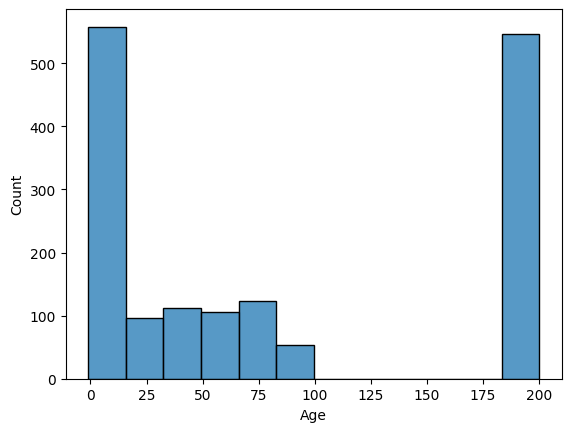

In [81]:
sns.histplot(df,x='Age')
plt.show()

**Handel Outliers**

In [82]:
df['Age'].replace({200.:20,-1.:15.},inplace=True)

In [83]:
df['Age'].describe()

,Age
count,1594.000000
mean,28.939147
std,20.985618
min,15.000000
25%,15.000000
50%,20.000000
75%,32.000000
max,90.000000


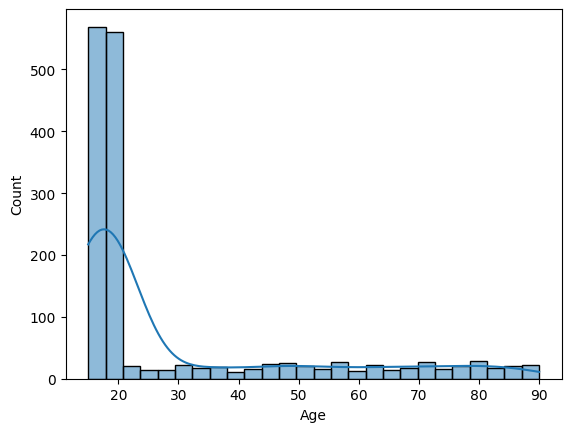

In [84]:
sns.histplot(df,x='Age',kde=True)
plt.show()

In [85]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [86]:
df['Age'].isnull().sum()

np.int64(0)

In [87]:
df['Age'].describe()

,Age
count,2100.000000
mean,26.785238
std,18.677603
min,15.000000
25%,15.000000
50%,20.000000
75%,20.000000
max,90.000000


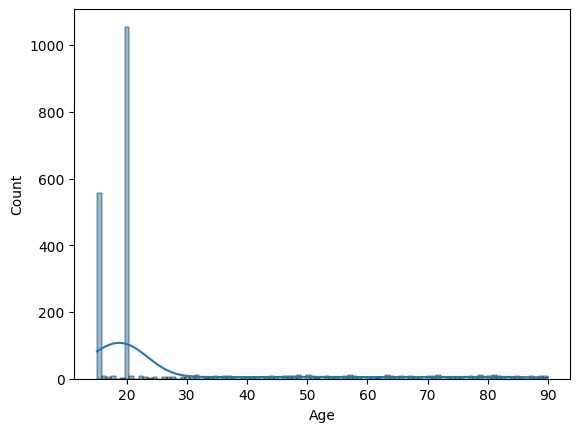

In [88]:
sns.histplot(df,x='Age',kde=True)
plt.show()

**Handel Product Category Column**

In [89]:
df['ProductCategory'].value_counts()

,count
ProductCategory,
Clothing,323
Electronics,323
Books,305
Home,296
Toys,288


In [90]:
df['ProductCategory'].isnull().sum()

np.int64(565)

In [91]:
df['ProductCategory'].fillna('Other',inplace=True)
df['ProductCategory'].value_counts()

,count
ProductCategory,
Other,565
Clothing,323
Electronics,323
Books,305
Home,296
Toys,288


**Handel Rating Column**

In [92]:
df['Rating'].value_counts()

,count
Rating,
3.0,326
2.0,310
5.0,307
10.0,291
4.0,278
1.0,266


In [93]:
df['Rating'].replace({10.0:5.0},inplace=True)
df['Rating'].fillna(3.0,inplace=True)
df['Rating'].unique()


array([3., 2., 5., 4., 1.])

**Handel Purchase Amount Column**

In [94]:
df['PurchaseAmount'].describe()

,PurchaseAmount
count,2003.000000
mean,509.897379
std,288.493923
min,5.060000
25%,263.495000
50%,519.420000
75%,765.180000
max,999.560000


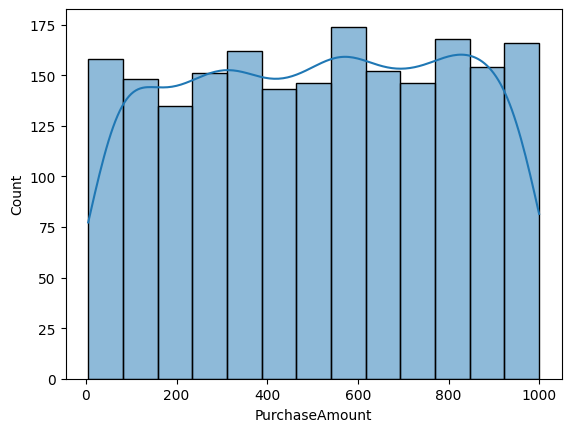

In [95]:
sns.histplot(df,x='PurchaseAmount',kde=True)
plt.show()

In [96]:
df['PurchaseAmount'].fillna(df['PurchaseAmount'].mean(),inplace=True)
df['PurchaseAmount'].isnull().sum()

np.int64(0)

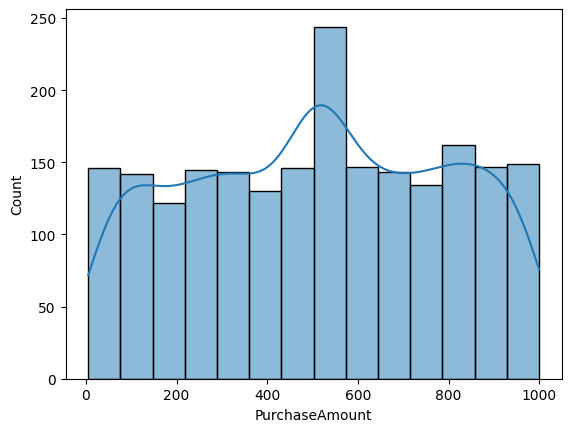

In [97]:
sns.histplot(df,x='PurchaseAmount',kde=True)
plt.show()

**Check Cleaning**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       2100 non-null   object        
 1   Name             2100 non-null   object        
 2   Age              2100 non-null   float64       
 3   Gender           2100 non-null   object        
 4   Email            2100 non-null   object        
 5   PurchaseAmount   2100 non-null   float64       
 6   PurchaseDate     2100 non-null   datetime64[ns]
 7   ProductCategory  2100 non-null   object        
 8   Rating           2100 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 164.1+ KB


In [99]:
df.isnull().sum()

,0
CustomerID,0
Name,0
Age,0
Gender,0
Email,0
PurchaseAmount,0
PurchaseDate,0
ProductCategory,0
Rating,0


In [100]:
df.head(30)

,CustomerID,Name,Age,Gender,Email,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,male,ali.hassan@gmail.com,837.310000,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,20.0,female,fatma.ali@hotmail.com,900.250000,2023-02-23,Other,3.0
2,CUST1002,Ahmed Mahmoud,15.0,male,ahmed.mahmoud@hotmail.com,761.720000,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,15.0,female,ahmed.gaber@gmail.com,303.720000,2023-12-30,Other,2.0
4,CUST1004,Ali Ibrahim,73.0,male,ali.ibrahim@yahoo.com,635.810000,2023-12-07,Clothing,2.0
5,CUST1005,Alaa Ibrahim,20.0,female,alaa.ibrahim@hotmail.com,886.260000,2025-01-16,Other,2.0
6,CUST1006,Mark Ali,15.0,male,mark.ali@hotmail.com,92.530000,2024-06-12,Books,2.0
7,CUST1007,Alaa Hassan,20.0,female,alaa.hassan@hotmail.com,318.430000,2024-05-17,Toys,5.0
8,CUST1008,John Hassan,89.0,male,john.hassan@yahoo.com,883.520000,2020-12-30,Home,4.0
9,CUST1009,Fatma Gaber,20.0,female,fatma.gaber@hotmail.com,966.470000,2025-01-24,Electronics,2.0


# Encoding + Scaling

In [101]:
# Identify numeric + categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# ColumnTransformer (High Performance)
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
    ],
    remainder='drop'
)

# Transform
X = ct.fit_transform(df)

# Extract encoded column names
num_features = ct.named_transformers_['num'].get_feature_names_out(num_cols)
cat_features = ct.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(num_features) + list(cat_features)

# Convert sparse → DataFrame
df_encoded = pd.DataFrame.sparse.from_spmatrix(X, columns=all_features)

df_encoded.head()


,Age,PurchaseAmount,Rating,CustomerID_CUST1000,CustomerID_CUST1001,CustomerID_CUST1002,CustomerID_CUST1003,CustomerID_CUST1004,CustomerID_CUST1005,CustomerID_CUST1006,...,Email_sara.mahmoud@yahoo.com,Email_sara.smith@gmail.com,Email_sara.smith@hotmail.com,Email_sara.smith@yahoo.com,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Other,ProductCategory_Toys
0,2.421378,1.162348,-0.222159,1.0,0,0,0,0,0,0,...,0,0,0,0,1.0,0,0,0,0,0
1,-0.363369,1.385792,-0.222159,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
2,-0.631133,0.893996,-0.960343,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,-0.631133,-0.731951,-0.960343,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,2.47493,0.447003,-0.960343,0,0,0,0,1.0,0,0,...,0,0,0,0,0,1.0,0,0,0,0


# Save New File

In [102]:
df.to_csv('Customers_Fakedata_Cleaned.csv')

# Exploratory Data Analysis (EDA)

**Top 10 PurchaseAmount**



In [103]:
df.sort_values(by= 'PurchaseAmount',ascending=False).head(10)

,CustomerID,Name,Age,Gender,Email,PurchaseAmount,PurchaseDate,ProductCategory,Rating
687,CUST1687,Alaa Ibrahim,20.0,female,alaa.ibrahim@yahoo.com,999.56,2025-05-16,Electronics,1.0
1949,CUST2949,Fatma Mahmoud,63.0,female,fatma.mahmoud@yahoo.com,999.30,2024-04-10,Clothing,3.0
424,CUST1424,John Ali,80.0,male,john.ali@gmail.com,999.23,2024-06-30,Toys,5.0
1832,CUST2832,John Ali,49.0,male,john.ali@yahoo.com,999.00,2024-10-10,Toys,1.0
1961,CUST2961,Mark Mahmoud,15.0,male,mark.mahmoud@yahoo.com,998.59,2025-04-25,Electronics,2.0
631,CUST1631,Lina Mahmoud,18.0,female,lina.mahmoud@gmail.com,998.16,2023-10-09,Books,5.0
386,CUST1386,Fatma Ali,20.0,female,fatma.ali@hotmail.com,995.55,2022-11-12,Clothing,4.0
335,CUST1335,Alaa Mahmoud,15.0,female,alaa.mahmoud@yahoo.com,995.41,2024-02-11,Toys,3.0
908,CUST1908,Sara Ali,20.0,female,sara.ali@yahoo.com,995.32,2023-09-04,Clothing,1.0
1708,CUST2708,Sara Hassan,15.0,female,sara.hassan@yahoo.com,995.25,2023-05-17,Electronics,3.0


**Top Sold Product Category**

In [ ]:
df['ProductCategory'].value_counts()

,count
ProductCategory,
Other,565
Clothing,323
Electronics,323
Books,305
Home,296
Toys,288


**Total Slaes**

In [105]:
total = round(df['PurchaseAmount'].sum(),1)
formatt = f"${total:,.1f}"
print(formatt)

$1,070,784.5


**Avg Sales**

In [106]:
Avg = round(df['PurchaseAmount'].mean(),1)
formatt = f"${Avg}"
print(formatt)

$509.9


# What is the most Customer gender segment ?

In [107]:
Gender_Count = df['Gender'].value_counts()
Gender_Count

,count
Gender,
male,1209
female,891


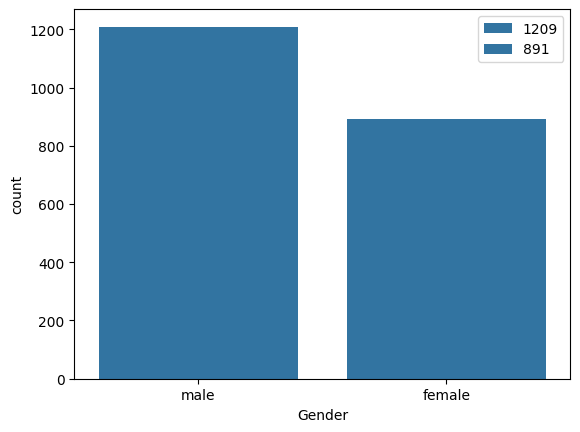

In [108]:
sns.countplot(df,x="Gender",label=Gender_Count)
plt.show()

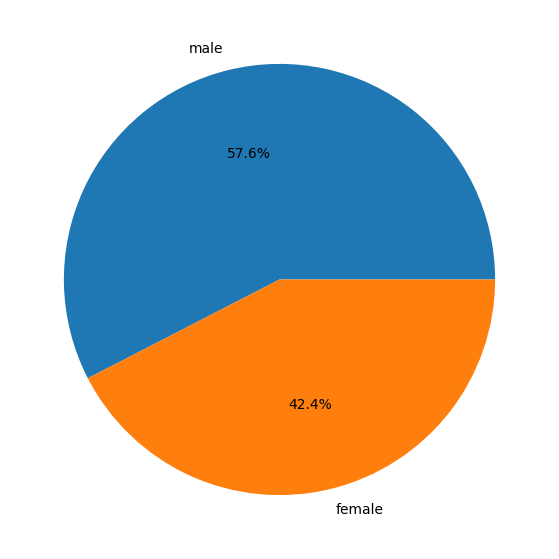

In [109]:
plt.figure(figsize=(9,7))
plt.pie(Gender_Count,labels=Gender_Count.index,autopct='%1.1f%%')
plt.show()

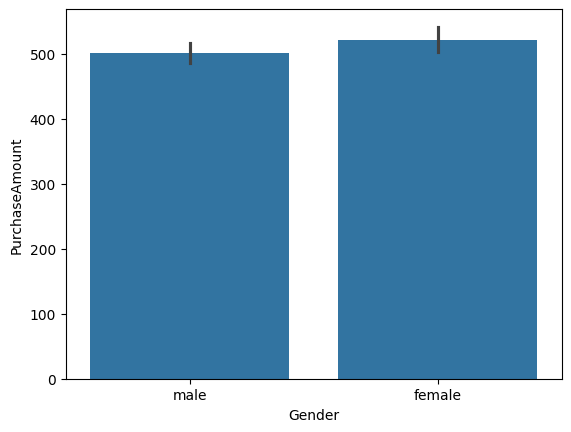

In [110]:
sns.barplot(df,x='Gender',y='PurchaseAmount')
plt.show()

# What is the month we in generates most Sales ?

In [111]:
df['Month'] = df['PurchaseDate'].dt.month
round(df.groupby('Month')['PurchaseAmount'].sum(),2).sort_values(ascending =False)

,PurchaseAmount
Month,
12,161753.78
5,101312.70
6,99607.76
11,98832.04
3,91837.46
4,88399.40
1,80632.26
2,79530.30
7,74980.74


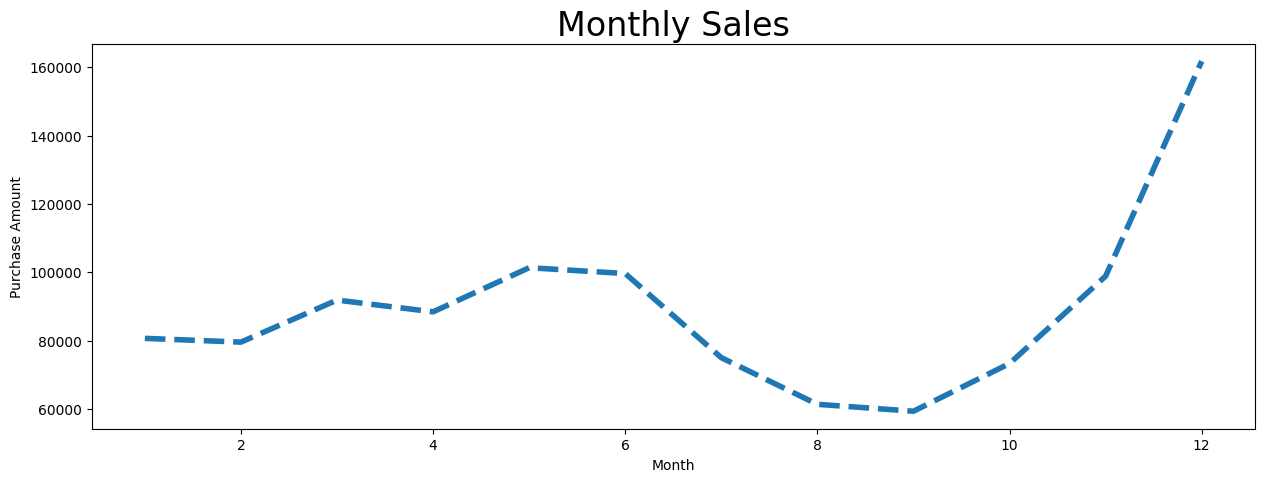

In [112]:
round(df.groupby('Month')['PurchaseAmount'].sum(),2).sort_index().plot(figsize=(15,5),linestyle='--',linewidth=4)
plt.ylabel('Purchase Amount')
plt.xlabel('Month')
plt.title('Monthly Sales',fontsize=24)
plt.show()

**Product Category Distribution**

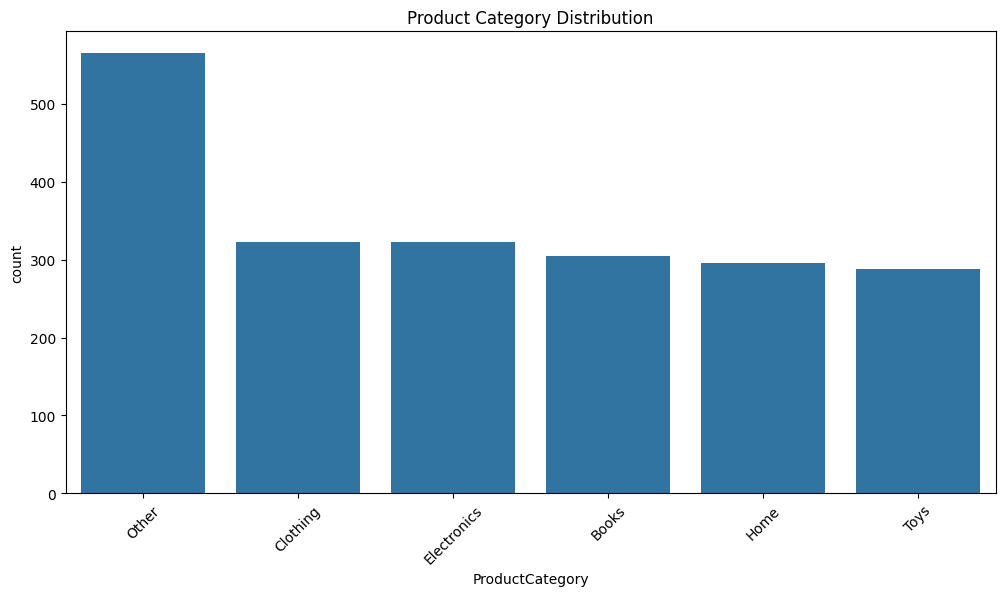

In [113]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='ProductCategory', order=df['ProductCategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Product Category Distribution')
plt.show()


**Age vs PurchaseAmount**

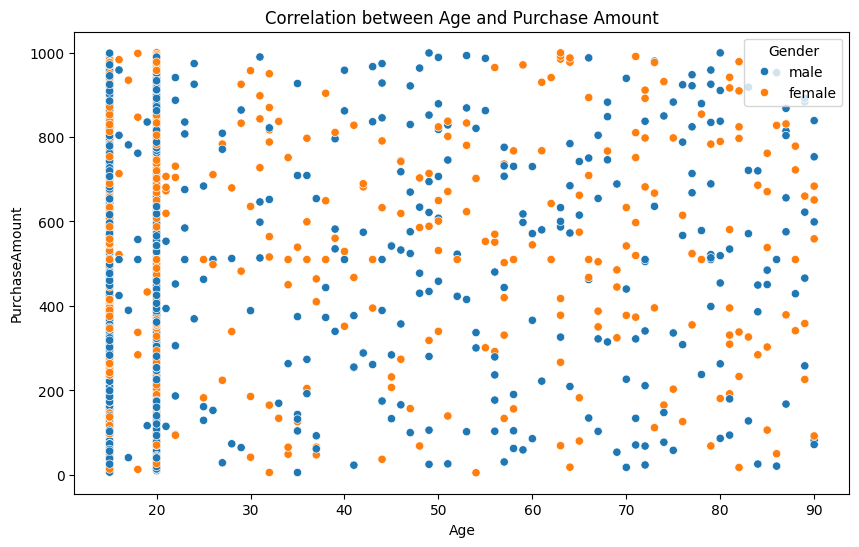

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='PurchaseAmount', hue='Gender')
plt.title('Correlation between Age and Purchase Amount')
plt.show()


**Heatmap Correlation**

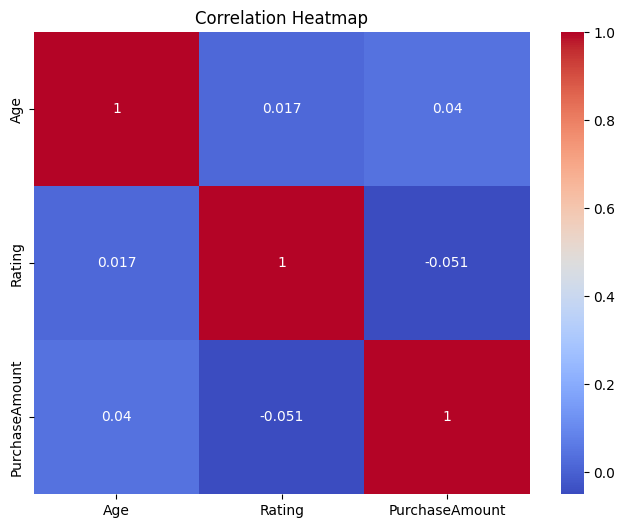

In [115]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Rating','PurchaseAmount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Purchases per Month**

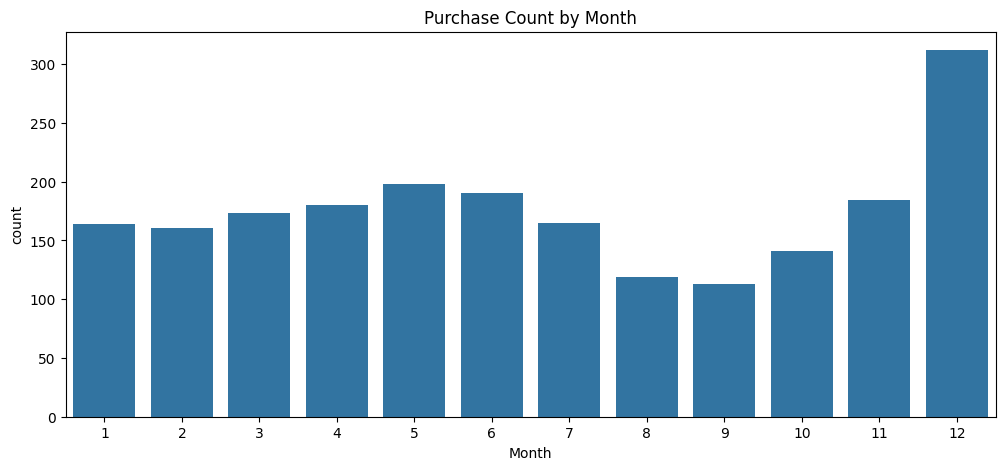

In [116]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Month')
plt.title('Purchase Count by Month')
plt.show()


**Scatter Matrix**

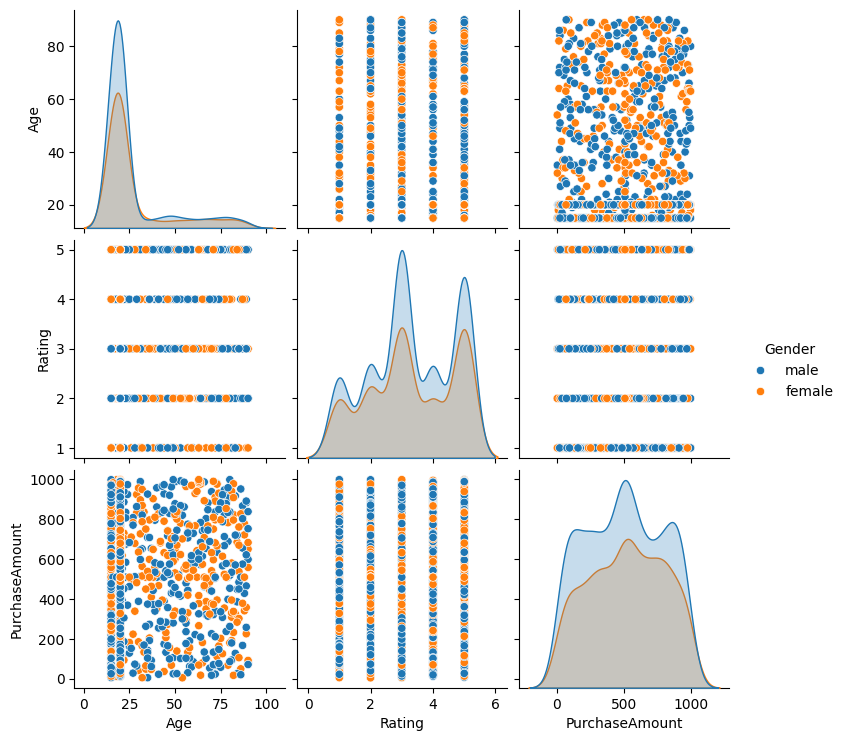

In [117]:
sns.pairplot(df[['Age','Rating','PurchaseAmount','Gender']], hue='Gender')
plt.show()


# Imports

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


# Load & Clean Data (مختصر – بدون EDA)

In [119]:
df = pd.read_csv('Customers_Fakedata.csv')

# Fix datatypes
df['Phone'] = df['Phone'].astype('object')
df['PurchaseDate'] = df['PurchaseDate'].replace({'32/13/2020': '2020-12-30'})
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')

# Drop useless columns
df.drop(columns=['Unnamed', '  Gender  ', 'Phone'], inplace=True, errors='ignore')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Gender
df['Gender'] = df['Gender'].str.lower()
df['Gender'].replace({'m': 'male', 'f': 'female'}, inplace=True)
df['Gender'].fillna('male', inplace=True)

# Age
df['Age'].replace({200.: 20, -1.: 15.}, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# ProductCategory
df['ProductCategory'].fillna('Other', inplace=True)

# Rating
df['Rating'].replace({10.0: 5.0}, inplace=True)
df['Rating'].fillna(3.0, inplace=True)

# PurchaseAmount
df['PurchaseAmount'].fillna(df['PurchaseAmount'].mean(), inplace=True)

# Month Feature
df['Month'] = df['PurchaseDate'].dt.month


# Target Variable

In [ ]:
df['is_electronics'] = np.where(
    df['ProductCategory'] == 'Electronics', 1, 0
)


# Features Selection

In [121]:
num_features = ['Age', 'PurchaseAmount', 'Rating', 'Month']
cat_features = ['Gender']

X = df[num_features + cat_features]
y = df['is_electronics']


# Train / Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Preprocessing + Model (Pipeline)

In [123]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])


# Train & Evaluate

In [124]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {accuracy:.4f}")

Final Accuracy: 0.8452


Confusion Matrix

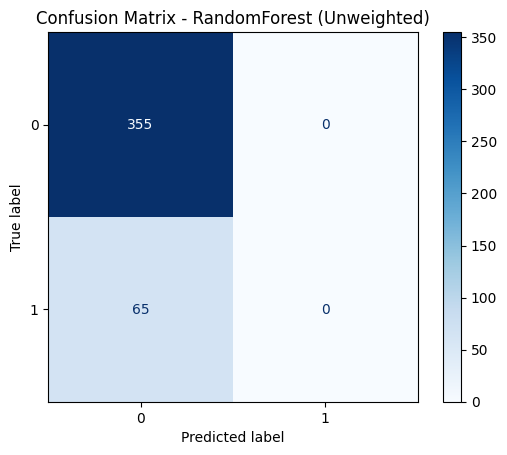

In [125]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForest (Unweighted)")
plt.show()


# Save Model

In [126]:
joblib.dump(pipeline, 'electronics_rf_pipeline.joblib')
print("Model saved successfully.")


Model saved successfully.


# Prediction Function (API / Deployment Ready)

In [127]:
def predict_category(new_data: dict) -> str:
    model = joblib.load('electronics_rf_pipeline.joblib')
    df_new = pd.DataFrame([new_data])
    pred = model.predict(df_new)[0]
    return 'Electronics' if pred == 1 else 'Other'


# Test

In [128]:
sample = {
    'Age': 30,
    'PurchaseAmount': 600,
    'Rating': 4,
    'Month': 6,
    'Gender': 'male'
}

print(predict_category(sample))


Other
